# 实证：附录

## 1 调查失业率是否真实？和招聘软件数据的验证

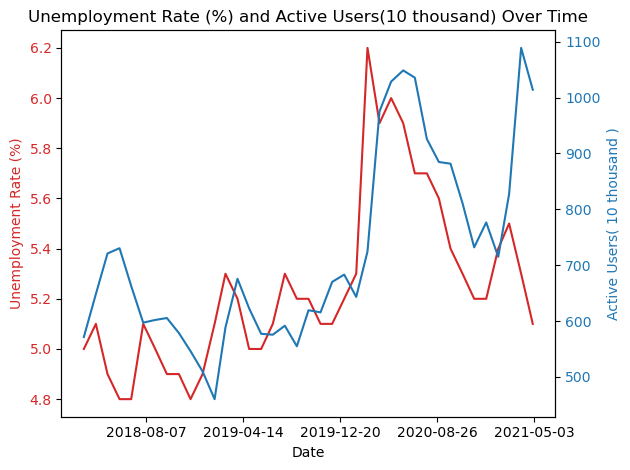

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 22 13:56:45 2024

@author: macbookairm1
"""

import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])

df = df.dropna(subset=['HIR'])

# 提取两个数据集
u_data = df[['date', 'U']]
hir_data = df[['date', 'HIR']]

# 使用merge合并两个数据集
merged_data = pd.merge(hir_data, u_data, on='date', how='inner')

# 创建画布和轴
fig, ax1 = plt.subplots()

# 绘制左侧轴的失业率
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Unemployment Rate (%)', color=color)
ax1.plot(merged_data['date'], merged_data['U'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建右侧轴
ax2 = ax1.twinx()  

# 绘制右侧轴的招聘软件活跃人数
color = 'tab:blue'
ax2.set_ylabel('Active Users( 10 thousand )', color=color)  
ax2.plot(merged_data['date'], merged_data['HIR'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 设置横轴刻度间隔为12个观测
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

# 添加标题
plt.title('Unemployment Rate (%) and Active Users(10 thousand) Over Time')

# 自动调整布局，避免轴标签重叠
plt.tight_layout()
plt.show()


## 2 CPI受到什么因素的影响？

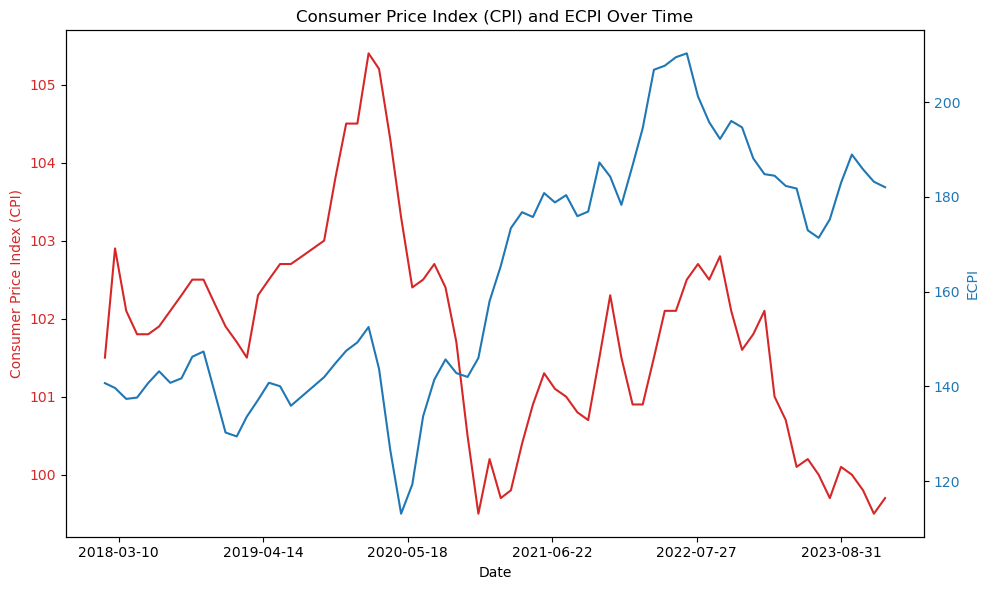

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])


df = df.dropna(subset=['ECPI'])

# 提取两个数据集
cpi_data = df[['date', 'CPI']]
ecpi_data = df[['date', 'ECPI']]

# 使用merge合并两个数据集
merged_data = pd.merge(ecpi_data, cpi_data, on='date', how='inner')

# 创建画布和轴
fig, ax1 = plt.subplots(figsize=(10, 6))

# 绘制左侧轴的CPI
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Consumer Price Index (CPI)', color=color)
ax1.plot(merged_data['date'], merged_data['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 创建右侧轴
ax2 = ax1.twinx()  

# 绘制右侧轴的另一变量 (ECPI)
color = 'tab:blue'
ax2.set_ylabel('ECPI', color=color)  
ax2.plot(merged_data['date'], merged_data['ECPI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 设置横轴刻度间隔为12个观测
ax1.xaxis.set_major_locator(plt.MaxNLocator(6))

# 添加标题
plt.title('Consumer Price Index (CPI) and ECPI Over Time')

# 自动调整布局，避免轴标签重叠
plt.tight_layout()
plt.show()


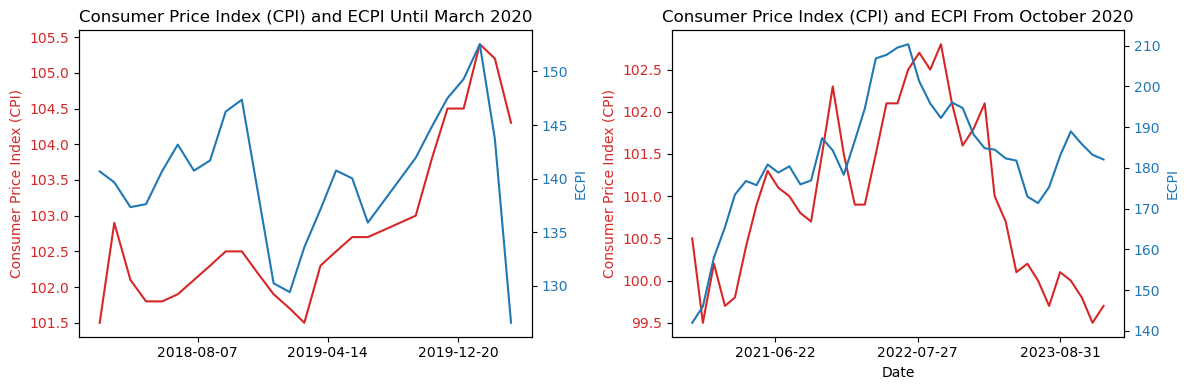

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])

df = df.dropna(subset=['ECPI'])

# 提取两个数据集
cpi_data = df[['date', 'CPI']]
ecpi_data = df[['date', 'ECPI']]

# 分割数据为两个时间段
df_before_2020_03 = df[df['date'] <= '2020-03-31']
df_after_2020_10 = df[df['date'] >= '2020-10-01']

# 创建图，横向排列两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

# 第一幅图，直到2020年03月
color = 'tab:red'
ax1.set_ylabel('Consumer Price Index (CPI)', color=color)
ax1.plot(df_before_2020_03['date'], df_before_2020_03['CPI'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1_right = ax1.twinx()
color = 'tab:blue'
ax1_right.set_ylabel('ECPI', color=color)  
ax1_right.plot(df_before_2020_03['date'], df_before_2020_03['ECPI'], color=color)
ax1_right.tick_params(axis='y', labelcolor=color)

ax1.set_title('Consumer Price Index (CPI) and ECPI Until March 2020')

# 设置第一幅图横轴刻度的最大数量为6
ax1.xaxis.set_major_locator(MaxNLocator(nbins=4))

# 第二幅图，从2020年10月开始
color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('Consumer Price Index (CPI)', color=color)
ax2.plot(df_after_2020_10['date'], df_after_2020_10['CPI'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2_right = ax2.twinx()
color = 'tab:blue'
ax2_right.set_ylabel('ECPI', color=color)  
ax2_right.plot(df_after_2020_10['date'], df_after_2020_10['ECPI'], color=color)
ax2_right.tick_params(axis='y', labelcolor=color)

ax2.set_title('Consumer Price Index (CPI) and ECPI From October 2020')

# 设置第二幅图横轴刻度的最大数量为6
ax2.xaxis.set_major_locator(MaxNLocator(nbins=4))

# 调整布局，避免轴标签重叠
plt.tight_layout()
plt.show()


### 2.1 CPI导致了工业增加值和工业利润的下降？

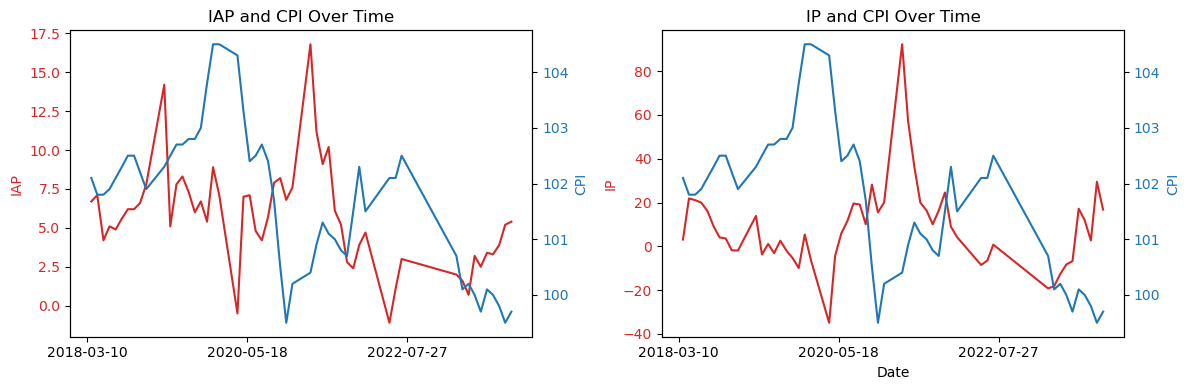

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件并去除空白值
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])
df = df.dropna(subset=['IAP', 'IP', 'CPI'])

# 提取两组数据集
iap_data = df[['date', 'IAP']]
ip_data = df[['date', 'IP']]
cpi_data = df[['date', 'CPI']]

# 创建图，左右轴共享x轴
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharex=False)

# 第一幅图，左轴为IAP，右轴为CPI
color = 'tab:red'
ax1.set_ylabel('IAP', color=color)
ax1.plot(iap_data['date'], iap_data['IAP'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1_right = ax1.twinx()  
color = 'tab:blue'
ax1_right.set_ylabel('CPI', color=color)  
ax1_right.plot(cpi_data['date'], cpi_data['CPI'], color=color)
ax1_right.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(plt.MaxNLocator(3))

ax1.set_title('IAP and CPI Over Time')

# 第二幅图，左轴为IP，右轴为CPI
color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('IP', color=color)
ax2.plot(ip_data['date'], ip_data['IP'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2_right = ax2.twinx()  
color = 'tab:blue'
ax2_right.set_ylabel('CPI', color=color)  
ax2_right.plot(cpi_data['date'], cpi_data['CPI'], color=color)
ax2_right.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_locator(plt.MaxNLocator(3))

ax2.set_title('IP and CPI Over Time')

# 调整布局，避免轴标签重叠
plt.tight_layout()
plt.show()


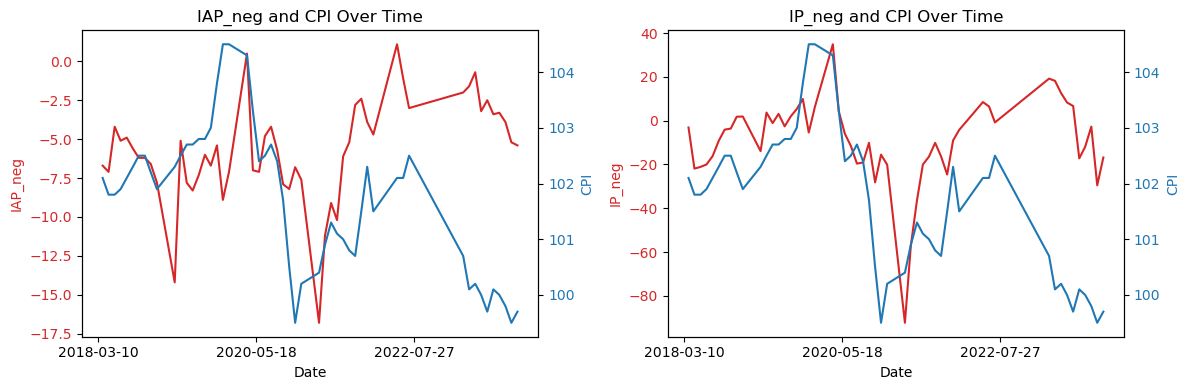

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])

df = df.dropna(subset=['IAP', 'IP', 'CPI'])

# 将 IAP 和 IP 乘以 -1，重新命名
df['IAP_neg'] = df['IAP'] * -1
df['IP_neg'] = df['IP'] * -1

# 提取三组数据集
iap_neg_data = df[['date', 'IAP_neg']]
ip_neg_data = df[['date', 'IP_neg']]
cpi_data = df[['date', 'CPI']]

# 创建图，横向排列两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# 第一幅图，左轴为IAP_neg，右轴为CPI
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('IAP_neg', color=color)
ax1.plot(iap_neg_data['date'], iap_neg_data['IAP_neg'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax1_right = ax1.twinx()  
color = 'tab:blue'
ax1_right.set_ylabel('CPI', color=color)  
ax1_right.plot(cpi_data['date'], cpi_data['CPI'], color=color)
ax1_right.tick_params(axis='y', labelcolor=color)

ax1.xaxis.set_major_locator(plt.MaxNLocator(3))
ax1.set_title('IAP_neg and CPI Over Time')

# 第二幅图，左轴为IP_neg，右轴为CPI
color = 'tab:red'
ax2.set_xlabel('Date')
ax2.set_ylabel('IP_neg', color=color)
ax2.plot(ip_neg_data['date'], ip_neg_data['IP_neg'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2_right = ax2.twinx()  
color = 'tab:blue'
ax2_right.set_ylabel('CPI', color=color)  
ax2_right.plot(cpi_data['date'], cpi_data['CPI'], color=color)
ax2_right.tick_params(axis='y', labelcolor=color)

ax2.xaxis.set_major_locator(plt.MaxNLocator(3))
ax2.set_title('IP_neg and CPI Over Time')

# 调整布局，避免轴标签重叠
plt.tight_layout()
plt.show()


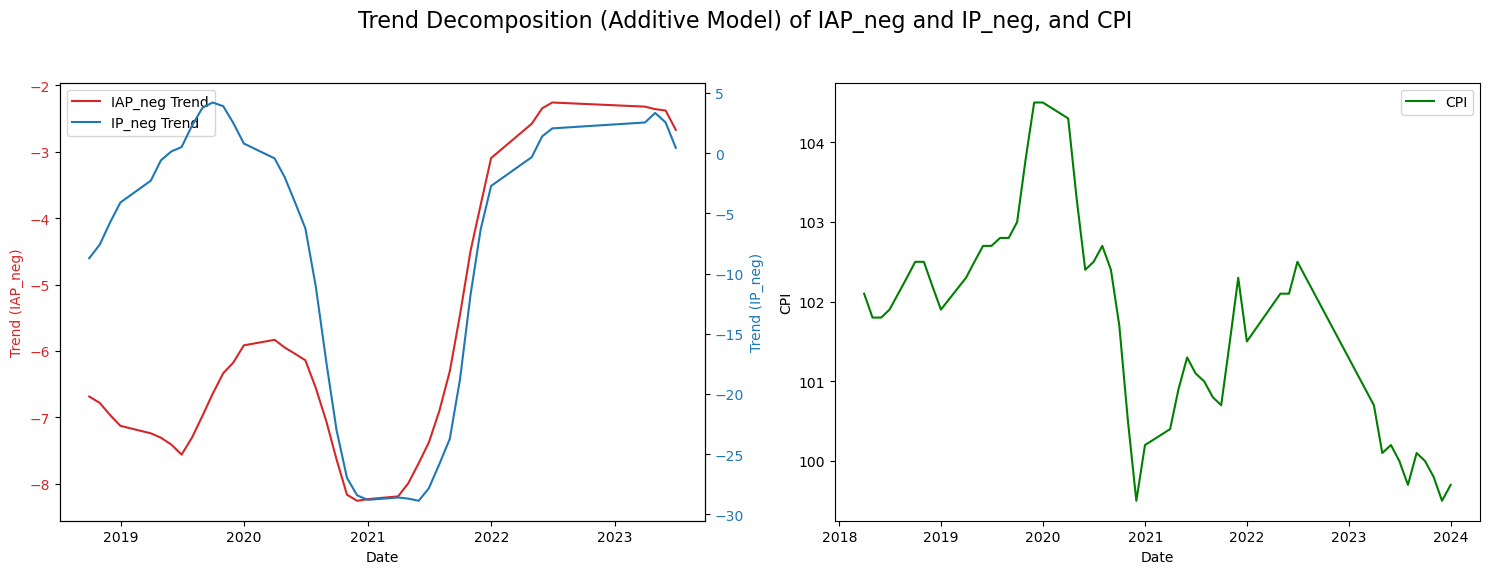

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取Excel文件并去除空白值
df = pd.read_excel('/Users/macbookairm1/Desktop/1-DATA.xlsx', parse_dates=['date'])

# 将 IAP 和 IP 乘以 -1，重新命名
df['IAP_neg'] = df['IAP'] * -1
df['IP_neg'] = df['IP'] * -1
df = df.dropna(subset=['IAP_neg', 'IP_neg', 'CPI'])

# 提取两组数据集
iap_neg_data = df[['date', 'IAP_neg']]
ip_neg_data = df[['date', 'IP_neg']]
cpi_data = df[['date', 'CPI']]

# 趋势分解，使用additive模型
result_iap = seasonal_decompose(iap_neg_data.set_index('date'), model='additive', period=12)
result_ip = seasonal_decompose(ip_neg_data.set_index('date'), model='additive', period=12)

# 创建画布和两个子图，横向排列
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 绘制第一幅图，两个趋势线，左右两个纵轴
line1, = ax1.plot(result_iap.trend, label='IAP_neg Trend', color='tab:red')
ax1.set_ylabel('Trend (IAP_neg)', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax1_2 = ax1.twinx()
line2, = ax1_2.plot(result_ip.trend, label='IP_neg Trend', color='tab:blue')
ax1_2.set_ylabel('Trend (IP_neg)', color='tab:blue')
ax1_2.tick_params(axis='y', labelcolor='tab:blue')

# 合并图例
lines = [line1, line2]
ax1.legend(lines, [line.get_label() for line in lines], loc='upper left')

# 绘制第二幅图，CPI
ax2.plot(cpi_data['date'], cpi_data['CPI'], label='CPI', color='green')
ax2.set_ylabel('CPI')
ax2.legend()

# 添加标题和标签
fig.suptitle('Trend Decomposition (Additive Model) of IAP_neg and IP_neg, and CPI', fontsize=16)
ax1.set_xlabel('Date')
ax2.set_xlabel('Date')

# 调整布局，避免轴标签重叠
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# 显示图表
plt.show()


## 3. 新解释：流动性释放作为内生性

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/2-DATA.xlsx')

# 处理特殊值（inf和NaN）
df = df.replace([np.inf, -np.inf], np.nan).dropna()

# 定义进行单位根检验的函数
def perform_adf_test(data, variable_name):
    result = adfuller(data, autolag='AIC')
    print(f'单位根检验结果 - {variable_name}:')
    print(f'ADF统计量: {result[0]}')
    print(f'p值: {result[1]}')
    print(f'临界值: {result[4]}')
    print('-----------------------------')

# 对每个变量及其差分数据进行单位根检验
variables = ['CPI', 'rate', 'avg_amount', 'r007']

for variable in variables:
    # 原始数据的单位根检验
    perform_adf_test(df[variable], variable)

    # 差分数据的单位根检验
    diff_data = df[variable].diff().dropna()
    perform_adf_test(diff_data, f'{variable} (差分)')


单位根检验结果 - CPI:
ADF统计量: -1.9995239194198262
p值: 0.28678188292022544
临界值: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
-----------------------------
单位根检验结果 - CPI (差分):
ADF统计量: -5.969823552622033
p值: 1.948220455481415e-07
临界值: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}
-----------------------------
单位根检验结果 - rate:
ADF统计量: -0.17106305652132217
p值: 0.9418840725006505
临界值: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
-----------------------------
单位根检验结果 - rate (差分):
ADF统计量: -5.463241052646115
p值: 2.491430309918017e-06
临界值: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
-----------------------------
单位根检验结果 - avg_amount:
ADF统计量: -2.455636634026204
p值: 0.12664479770439552
临界值: {'1%': -3.5319549603840894, '5%': -2.905755128523123, '10%': -2.5903569458676765}
-----------------------------
单位根检验结果 - avg_amount (差分):
ADF统计量: -15.05781821500029
p值: 9.

### 3.1 对差分后数据进行VAR和脉冲响应函数分析

#### 下述结果表明，以逆回购利率/逆回购金额/r007利率作为流动性代理变量来考察CPI的变化，得出的结论是不显著的。这在某种程度上表明CPI的上涨与央行公开市场操作的关系并不密切或显著，当前证据不足以支撑新解释。

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 07, Mar, 2024
Time:                     15:39:42
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    2.55893
Nobs:                     64.0000    HQIC:                   2.15005
Log likelihood:          -403.545    FPE:                    6.58999
AIC:                      1.88428    Det(Omega_mle):         4.87762
--------------------------------------------------------------------
Results for equation CPI
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.033163         0.064419           -0.515           0.607
L1.CPI                0.149985         0.126528            1.185           0.236
L1.rate              -1.265054         2.269910           -0.5

/Users/macbookairm1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


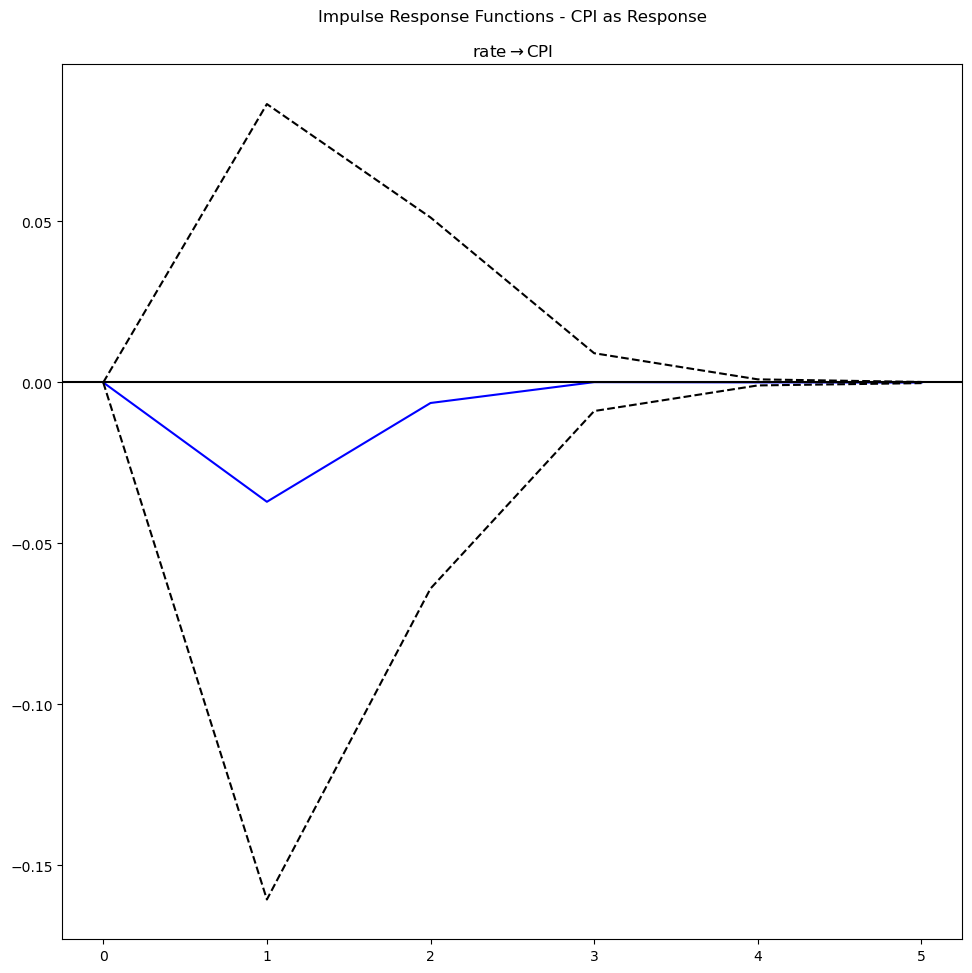

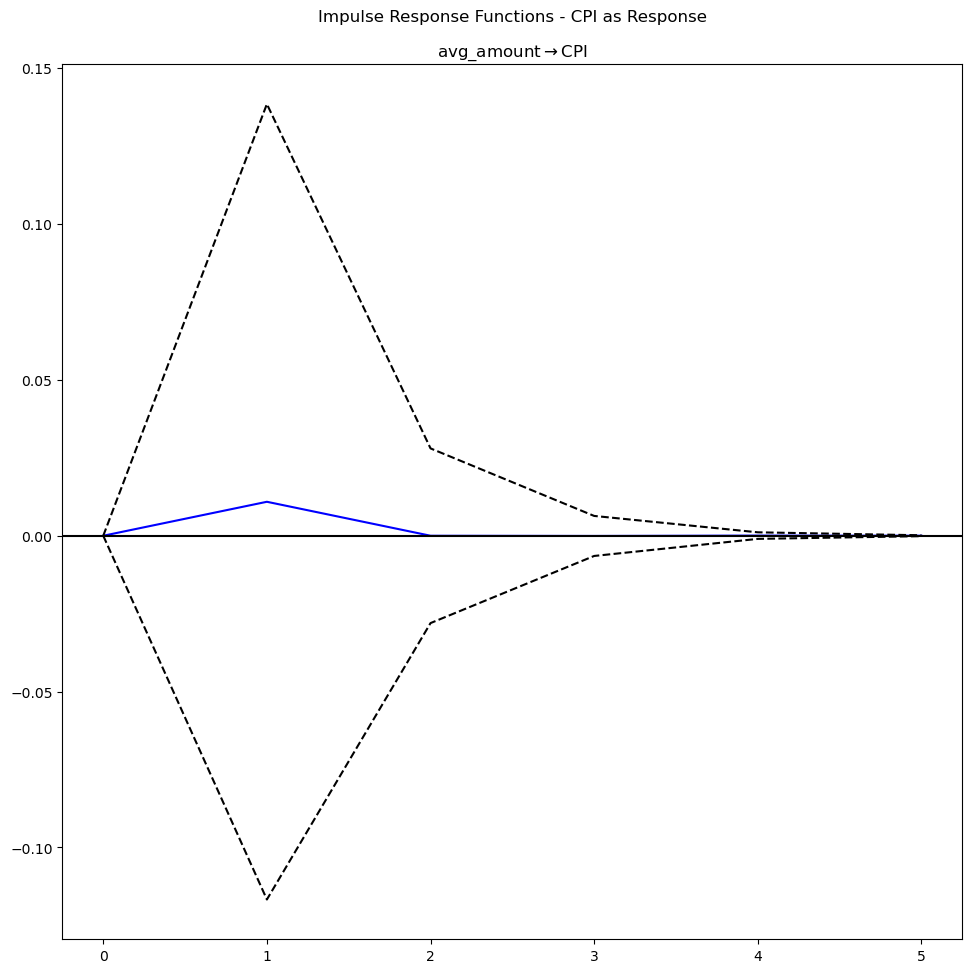

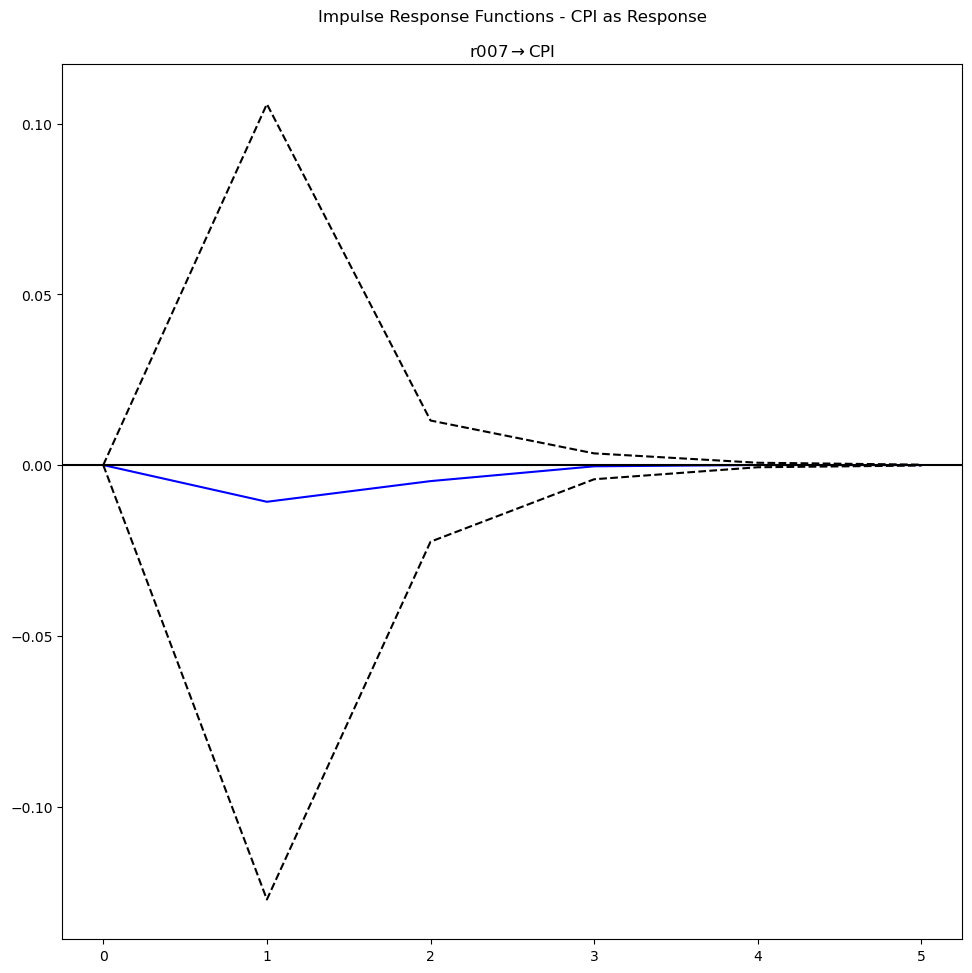

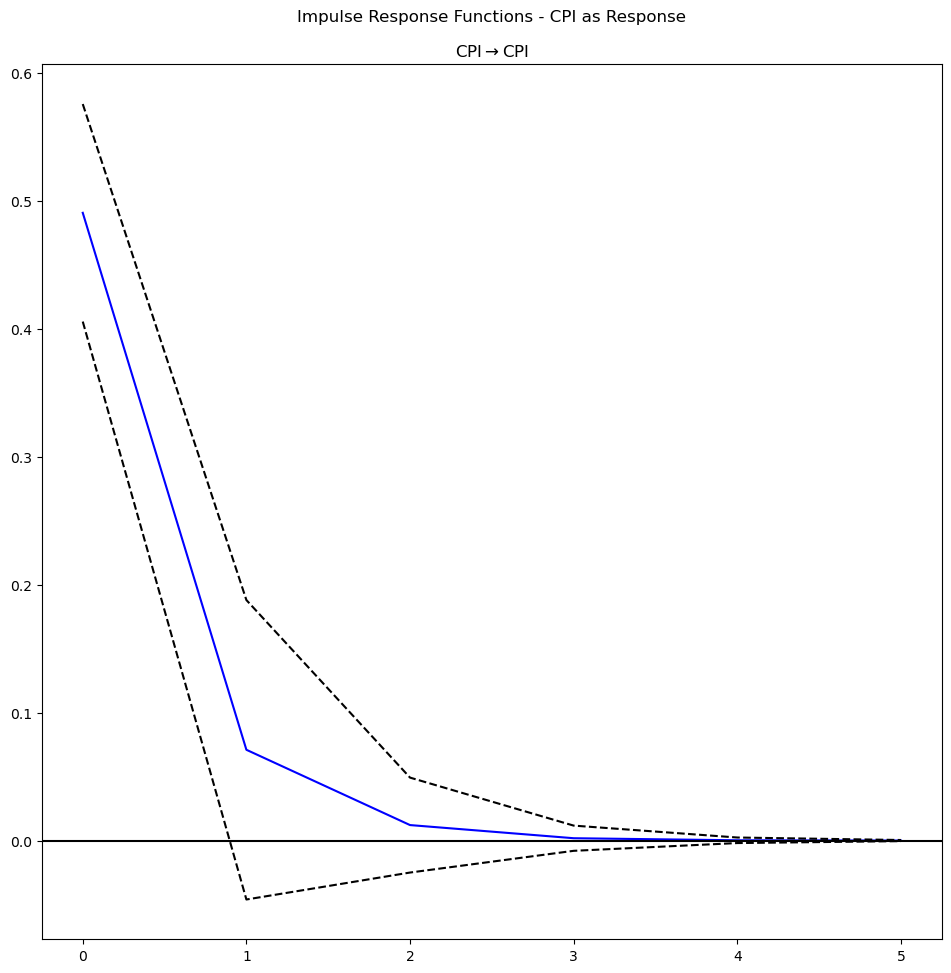

In [9]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/2-DATA.xlsx')


# 提取日期列
dates = df['date']

# 差分数据并排除日期列
diff_df = df.drop(columns=['date']).diff().dropna()

# 定义VAR模型
model = VAR(diff_df)

# 拟合VAR模型
results = model.fit()

# 打印模型的摘要信息
print(results.summary())

# 绘制脉冲响应函数（以CPI为响应变量）
irf = results.irf(5)  # 5表示时间点的数量，你可以根据需要调整
irf.plot(impulse=1, response=variables.index('CPI'), orth=True)  # 将variables.index('CPI')替换为CPI在variables列表中的索引
plt.suptitle('Impulse Response Functions - CPI as Response')
plt.show()

# 绘制脉冲响应函数（以CPI为响应变量）
irf = results.irf(5)  # 5表示时间点的数量，你可以根据需要调整
irf.plot(impulse=2, response=variables.index('CPI'), orth=True)  # 将variables.index('CPI')替换为CPI在variables列表中的索引
plt.suptitle('Impulse Response Functions - CPI as Response')
plt.show()
# 绘制脉冲响应函数（以CPI为响应变量）
irf = results.irf(5)  # 5表示时间点的数量，你可以根据需要调整
irf.plot(impulse=3, response=variables.index('CPI'), orth=True)  # 将variables.index('CPI')替换为CPI在variables列表中的索引
plt.suptitle('Impulse Response Functions - CPI as Response')
plt.show()

# 绘制脉冲响应函数（以CPI为响应变量）
irf = results.irf(5)  # 5表示时间点的数量，你可以根据需要调整
irf.plot(impulse=0, response=variables.index('CPI'), orth=True)  # 将variables.index('CPI')替换为CPI在variables列表中的索引
plt.suptitle('Impulse Response Functions - CPI as Response')
plt.show()